<a href="https://colab.research.google.com/github/jyotidabass/Classification/blob/main/Color_Extraction_and_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Extraction and Image Segmentation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

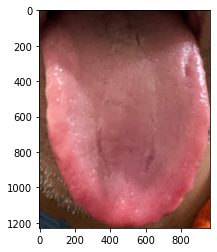

(1187214, 3)


In [3]:
im = cv2.imread('/content/sample_data/0CA41A93-47F3-40CD-9479-8FB4CCFED190 - vinay kumar.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)
plt.show()
reshaped_im = im.reshape((-1, 3))
print(reshaped_im.shape)

In [4]:
k = 5
kmeans = KMeans(k)

In [5]:
kmeans.fit(reshaped_im)

KMeans(n_clusters=5)

In [6]:
dominant_colors = kmeans.cluster_centers_.astype('uint8')
dominant_colors

array([[165,  90,  92],
       [227, 148, 154],
       [ 58,  30,  23],
       [193, 111, 114],
       [110,  63,  51]], dtype=uint8)

In [7]:
np.zeros_like(reshaped_im).shape

(1187214, 3)

In [8]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

(1229, 966, 3)


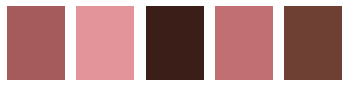

In [9]:
plt.figure()
for i,color in enumerate(dominant_colors):
    palette = np.zeros_like(im, dtype='uint8')
    palette[:,:,:] = color
    plt.subplot(1,k,i+1)
    plt.axis("off")
    plt.imshow(palette)
print(im.shape)    

In [10]:
new_img = np.zeros((im.shape[0]*im.shape[1],3),dtype='uint8')
print(new_img.shape)

(1187214, 3)


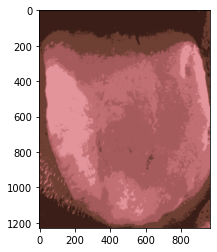

In [11]:
for ix in range(new_img.shape[0]):
    new_img[ix] = dominant_colors[kmeans.labels_[ix]]
    
new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()